In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re

In [45]:
with open("CL_test__Kp_13dot2__Ki_44dot0.txt", "r") as file:
    raw_data = file.read().strip().split("Mode")[1:-2]

ndata = len(raw_data)
columns = list(map(lambda x: (x.split(" = ")[0]), raw_data[0].strip().split("\n")[1:]))
columns = ["Mode", *columns]

data_mode = ndata*[""]
data_np = np.zeros((len(columns)-1, ndata))

for i in range(ndata):
    spi_in_str = False
    current = raw_data[i]
    if ("SPI" in raw_data[i]):
        spi_in_str = True
        current = re.sub("SPI.*", "", raw_data[i], flags=re.S)
    if ("query" in raw_data[i]):
        current = re.sub("query.*\n", "", current)   
    if ("\na = " in raw_data[i]):
        current = re.sub("\na = .*", "\n", current, flags=re.S)
    if ("\nstate is" in raw_data[i]):
        current = re.sub("\nstate is.*", "\n", current, flags=re.S) 
    try:  
        splitted_data = current.strip().split("\n")
        mode = splitted_data[0].strip()
        data_mode[i] = mode
        data_np[:,i] = list(map(lambda x: float(x.split(" = ")[-1]), splitted_data[1:]))

    except:
        print("Error parsing sample number ", i, "\n")
        print(raw_data[i])
        print(current)
        break

data = pd.DataFrame(data_np.T, columns=columns[1:])
data.insert(0,"time",np.cumsum(data["dt"]),False)
data.insert(0,"Mode",data_mode,False)

data

,Mode,time,dt,xpos,ypos,thetapos,vfwd,omega,speed_left,speed_right,dc left,dc right,el_filtered,er_filtered,isl,isr,ref_speedl,ref_speedr
0,idle,0.005001,0.005001,0.019,-0.000839,-0.131548,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
1,idle,0.010002,0.005001,0.019,-0.000839,-0.131548,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
2,idle,0.015003,0.005001,0.019,-0.000839,-0.131548,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
3,idle,0.020004,0.005001,0.019,-0.000839,-0.131548,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
4,idle,0.025005,0.005001,0.019,-0.000839,-0.131548,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6771,SpeedControl,33.866772,0.005001,0.910,-0.122451,-0.115619,0.0,0.0,0.0,0.0,256.0,256.0,0.4,0.4,1.0,1.0,0.4,0.4
6772,SpeedControl,33.871773,0.005001,0.910,-0.122451,-0.115619,0.0,0.0,0.0,0.0,256.0,256.0,0.4,0.4,1.0,1.0,0.4,0.4
6773,SpeedControl,33.876774,0.005001,0.910,-0.122451,-0.115619,0.0,0.0,0.0,0.0,256.0,256.0,0.4,0.4,1.0,1.0,0.4,0.4
6774,SpeedControl,33.881775,0.005001,0.910,-0.122451,-0.115619,0.0,0.0,0.0,0.0,256.0,256.0,0.4,0.4,1.0,1.0,0.4,0.4


In [57]:
mask = data["Mode"] != "idle"
# mask = np.logical_and(mask, data["time"] <=100)
t0 = data["time"][mask].iloc[0]
x0 = data["xpos"][mask].iloc[0]
y0 = data["ypos"][mask].iloc[0]

data = data[mask]
data["time"] -= t0
data["xpos"] -= x0
data["ypos"] -= y0

mask = np.logical_and(mask, data["time"] <= 1)
data = data[mask]
data

,Mode,time,dt,xpos,ypos,thetapos,vfwd,omega,speed_left,speed_right,dc left,dc right,el_filtered,er_filtered,isl,isr,ref_speedl,ref_speedr
5579,SpeedControl,0.000000,0.005001,0.000,0.000000,-0.131548,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.157412,0.157412,0.015744,0.015744,0.4,0.4
5580,SpeedControl,0.005001,0.005001,0.001,-0.000004,-0.131486,0.005753,0.012366,0.004720,0.006785,50.0,50.0,0.251020,0.250207,0.040851,0.040770,0.4,0.4
5581,SpeedControl,0.010002,0.005001,0.001,-0.000027,-0.131477,0.034960,0.001767,0.034812,0.035107,100.0,100.0,0.295948,0.295340,0.070452,0.070310,0.4,0.4
5582,SpeedControl,0.015003,0.005001,0.001,-0.000084,-0.132007,0.087030,-0.105995,0.095881,0.078180,150.0,150.0,0.299164,0.305760,0.100375,0.100892,0.4,0.4
5583,SpeedControl,0.020004,0.005001,0.002,-0.000196,-0.133412,0.169488,-0.280886,0.192942,0.146034,200.0,200.0,0.262917,0.285378,0.126672,0.129436,0.4,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5774,SpeedControl,0.975195,0.005001,0.361,-0.052188,-0.136646,0.393260,0.113061,0.383819,0.402700,132.0,121.0,0.011708,-0.002001,0.465064,0.484204,0.4,0.4
5775,SpeedControl,0.980196,0.005001,0.371,-0.052461,-0.136690,0.400488,-0.008833,0.401225,0.399750,137.0,120.0,0.006619,-0.001115,0.465726,0.484092,0.4,0.4
5776,SpeedControl,0.985197,0.005001,0.371,-0.052739,-0.137326,0.406831,-0.127194,0.417451,0.396210,129.0,122.0,-0.002854,0.000815,0.465441,0.484174,0.4,0.4
5777,SpeedControl,0.990198,0.005001,0.371,-0.053021,-0.138174,0.410371,-0.169592,0.424532,0.396210,114.0,125.0,-0.011385,0.001986,0.464302,0.484372,0.4,0.4


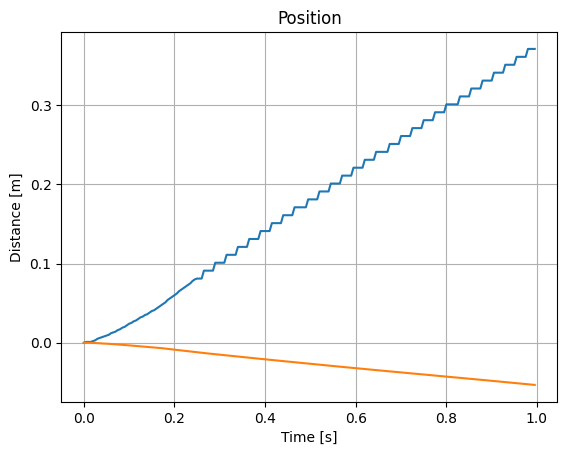

In [58]:
plt.title("Position")
plt.plot(data["time"], data["xpos"], label="x")
plt.plot(data["time"], data["ypos"], label="y")
plt.xlabel("Time [s]")
plt.ylabel("Distance [m]")
plt.grid()
plt.show()

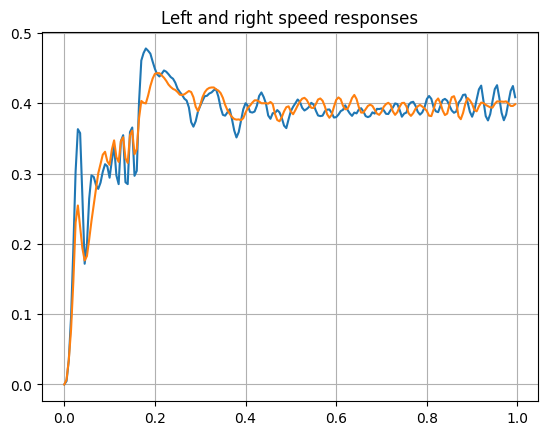

In [61]:
plt.title("Left and right speed responses")
plt.plot(data['time'], data["speed_left"], label="left speed")
plt.plot(data['time'], data["speed_right"], label="right speed")
plt.grid()
plt.show()

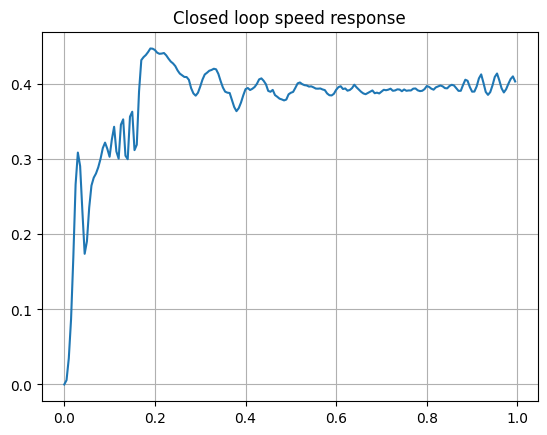

In [62]:
plt.title("Closed loop speed response")
plt.plot(data['time'], data["vfwd"])
plt.grid()
plt.show()

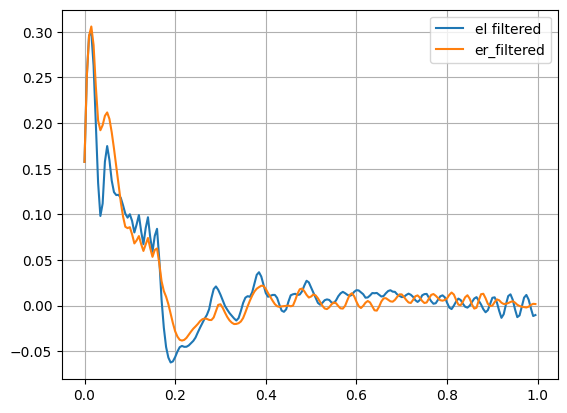

In [63]:
plt.plot(data["time"], data["el_filtered"], label="el filtered")
plt.plot(data["time"], data["er_filtered"], label="er_filtered")
plt.grid()
plt.legend()
plt.show()